In [20]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Data Shape: (800, 20)
Testing Data Shape: (200, 20)

Class Distribution:
Training: [0.50875 0.49125]
Testing: [0.465 0.535]


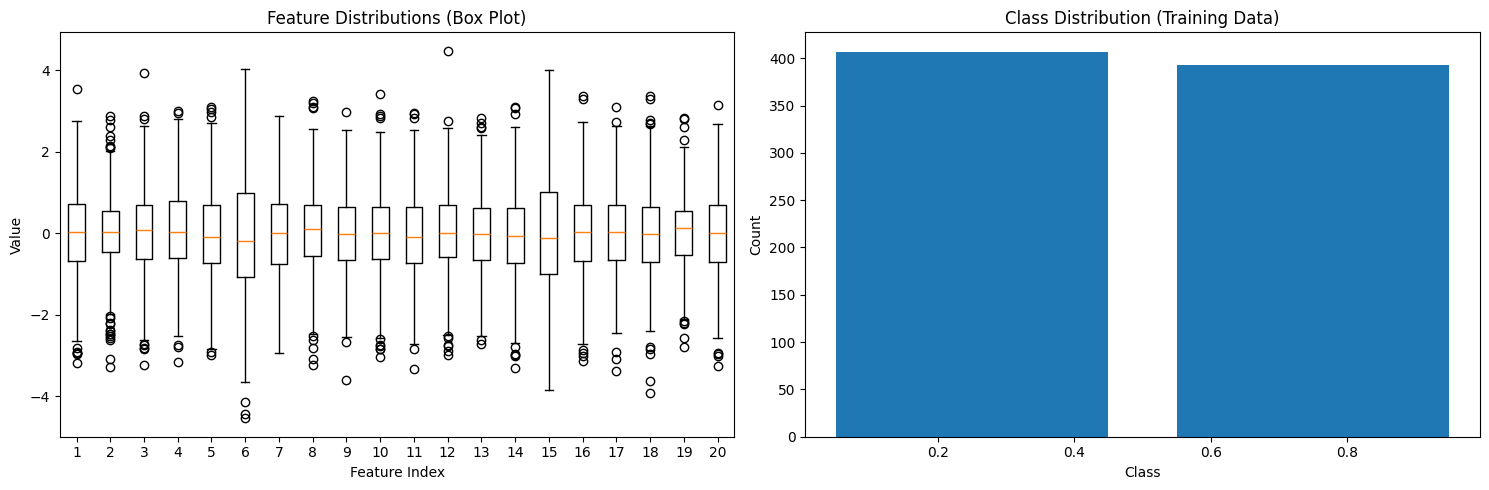

In [21]:

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)
print("\nClass Distribution:")
print("Training:", np.bincount(y_train) / len(y_train))
print("Testing:", np.bincount(y_test) / len(y_test))

# Visualize feature distributions
plt.figure(figsize=(15, 5))

# Box plot of features
plt.subplot(1, 2, 1)
plt.boxplot(X_train)
plt.title('Feature Distributions (Box Plot)')
plt.xlabel('Feature Index')
plt.ylabel('Value')

# Class distribution
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, rwidth=0.8)
plt.title('Class Distribution (Training Data)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [22]:
# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters
params = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Train model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)


In [23]:
# %% [markdown]
# ## 3. Model Evaluation

# %%
# Make predictions (probabilities)
pred_proba = model.predict(dtest)
# Convert probabilities to class predictions (0 or 1)
pred_class = (pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_class)
print(f"Accuracy: {accuracy:.4f}")

# Show detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_class))

# Plot learning curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Learning curves
ax1.plot(evals_result['train']['logloss'], label='Train')
ax1.plot(evals_result['test']['logloss'], label='Test')
ax1.set_xlabel('Number of Boosting Rounds')
ax1.set_ylabel('LogLoss')
ax1.set_title('XGBoost Training vs Testing Loss')
ax1.legend()
ax1.grid(True)

# Plot 2: Predictions vs Actual
ax2.scatter(y_test, pred_proba, alpha=0.5)
ax2.plot([0, 1], [0, 1], 'r--')  # diagonal line for perfect predictions
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Probabilities')
ax2.set_title('Predictions vs Actual Values')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Show confusion matrix
cm = pd.crosstab(y_test, pred_class, margins=True)
print("\nConfusion Matrix:")
print(cm)

NameError: name 'accuracy_score' is not defined